In [4]:
# Import the necessary libraries

#libraries for data wrangling
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [5]:
# # Load  the data
# data_path = r"archive.zip" # I am using relative path
# df = pd.read_csv(data_path, low_memory=True,compression='zip') # This is how to load zipped csv file
# df.tail()

In [6]:
# df=pd.read_csv('Crimes_-_2001_to_Present.csv')

In [7]:
data = {'data':'ada','age':23,'ethnicity': 'Yoruba'}
pd.Series(data)

data            ada
age              23
ethnicity    Yoruba
dtype: object

it has 7784664 rows and 22 columns 

In [8]:
# Lets write a function to load the full dataset (7M+ records) or just a specified samples.
# The  idea behind this is just to reduce memory usage for the dataset to also load faster.
# Take your time to understand the function, what I did and why I did so.

def load_chicago_crime_data(data_path, sample_size=None):
    """
    Optimized loading function for Chicago crime data
    """
    # Define data types to reduce memory usage
    dtype_dict = {
        'ID': 'Int32',
        'Case Number': 'string',
        'IUCR': 'category',
        'Primary Type': 'category',
        'Description': 'category',
        'Location Description': 'category',
        'Arrest': 'bool',
        'Domestic': 'bool',
        'Beat': 'Int16',
        'District': 'Int8',
        'Ward': 'Int8',
        'Community Area': 'Int8',
        'FBI Code': 'category',
        'X Coordinate': 'float32',
        'Y Coordinate': 'float32',
        'Latitude': 'float32',
        'Longitude': 'float32'
    }
    
    # Parse dates during loading
    date_cols = ['Date', 'Updated On']
    
    if sample_size:
        # Load random sample for faster analysis
        df = pd.read_csv(data_path, 
                        dtype=dtype_dict,
                        parse_dates=date_cols,
                        low_memory=False, keep_default_na=True, nrows = sample_size) # you can use ".sample(n=sample_size)" as well.
    else:
        df = pd.read_csv(data_path, 
                        dtype=dtype_dict,
                        parse_dates=date_cols,
                        low_memory=False, keep_default_na=True)
        df.to_parquet('crimes.parquet',index=False)
    
    return df

# I would load this and comment it out...

In [ ]:
df=load_chicago_crime_data('Crimes_-_2001_to_Present.csv')

Checking how many unique values we have in each columns 


In [ ]:
print('Column Name \t\t\t\t\t number of unique rows')
for i in list(df.columns):
    unirow=df[i].nunique()
    print(f'{i}\t\t\t\t\t {unirow}')

Column Name 					 number of unique rows
ID					 100000
Case Number					 100000
Date					 45627
Block					 22305
IUCR					 307
Primary Type					 33
Description					 322
Location Description					 118
Arrest					 2
Domestic					 2
Beat					 274
District					 23
Ward					 50
Community Area					 77
FBI Code					 25
X Coordinate					 36856
Y Coordinate					 45837
Year					 20
Updated On					 562
Latitude					 40741
Longitude					 24169
Location					 64174


i want to know more about the icur and blocks ,primary type,year,fbi code,community areA, an all other columns where unique number of rows is < 200 000

In [ ]:
for i in list(df.columns):
    if df[i].nunique() <= 200000 :
        print('===================================')
        print(f'     =====Unique {i} =====')
        print('===================================')

        unirow=df[i].unique()
        print(unirow)

     =====Unique ID =====
<IntegerArray>
[10224738, 10224739, 11646166, 10224740, 10224741, 10224742, 10224743, 10224744, 10224745, 11645836,
 ...
 10215490, 10215491, 10215493, 11261630, 11262256, 10215495, 10215496, 10215497, 10215498, 10215499]
Length: 100000, dtype: Int32
     =====Unique Case Number =====
<StringArray>
['HY411648', 'HY411615', 'JC213529', 'HY411595', 'HY411610', 'HY411435', 'HY411629', 'HY411605', 'HY411654', 'JC212333',
 ...
 'HY401677', 'HY401628', 'HY401576', 'JB192986', 'JB193886', 'HY401397', 'HY401545', 'HY401614', 'HY401663', 'HY401688']
Length: 100000, dtype: string
     =====Unique Date =====
<DatetimeArray>
['2015-09-05 13:30:00', '2015-09-04 11:30:00', '2018-09-01 00:01:00', '2015-09-05 12:45:00', '2015-09-05 13:00:00', '2015-09-05 10:55:00', '2015-09-04 18:00:00', '2015-09-05 11:30:00', '2016-05-01 00:25:00', '2015-09-05 14:00:00',
 ...
 '2015-08-29 03:23:00', '2015-08-29 02:04:00', '2015-08-29 05:32:00', '2015-08-29 05:05:00', '2018-07-27 19:44:31', '

we have 45627 unique dates which means that some incidents occured  on the same day,and time

In [ ]:
def analyze_missingdata(df):
        missing_data = pd.DataFrame({
                'Column': df.columns,
                'Missing_Count': df.isnull().sum(),
                'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
                'Data_Type': df.dtypes})
        
        missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
        print("=== MISSING DATA ANALYSIS ===")
        print(missing_data)
        # Visualize missing data
        plt.figure(figsize=(12, 6))
        if not missing_data.empty:
                plt.bar(missing_data['Column'], missing_data['Missing_Percentage'])
                plt.title('Missing Data by Column')
                plt.xlabel('Columns')
                plt.ylabel('Missing Percentage (%)')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
        else:
                print("No missing data found!")
        missingcol = list(missing_data.index)
        for i in missingcol:
                if (df[i].dtype != object) and (df[i].dtype != bool and (df[i].dtype != 'category')):
                        maxval =df[i].max()
                        minval =df[i].min()
                        print('max value is : ',maxval)
                        print('min value is : ',minval)
                        print(f'mean for {i} is {df[i].mean()}')
                        print(f'median for {i} is {df[i].median()}')
                else:
                        print(f'column {i} is an object type column')

=== MISSING DATA ANALYSIS ===
                                    Column  Missing_Count  Missing_Percentage Data_Type
X Coordinate                  X Coordinate           2231               2.231   float32
Longitude                        Longitude           2231               2.231   float32
Latitude                          Latitude           2231               2.231   float32
Y Coordinate                  Y Coordinate           2231               2.231   float32
Location                          Location           2231               2.231    object
Location Description  Location Description            271               0.271  category
Community Area              Community Area              4               0.004      Int8
Ward                                  Ward              4               0.004      Int8


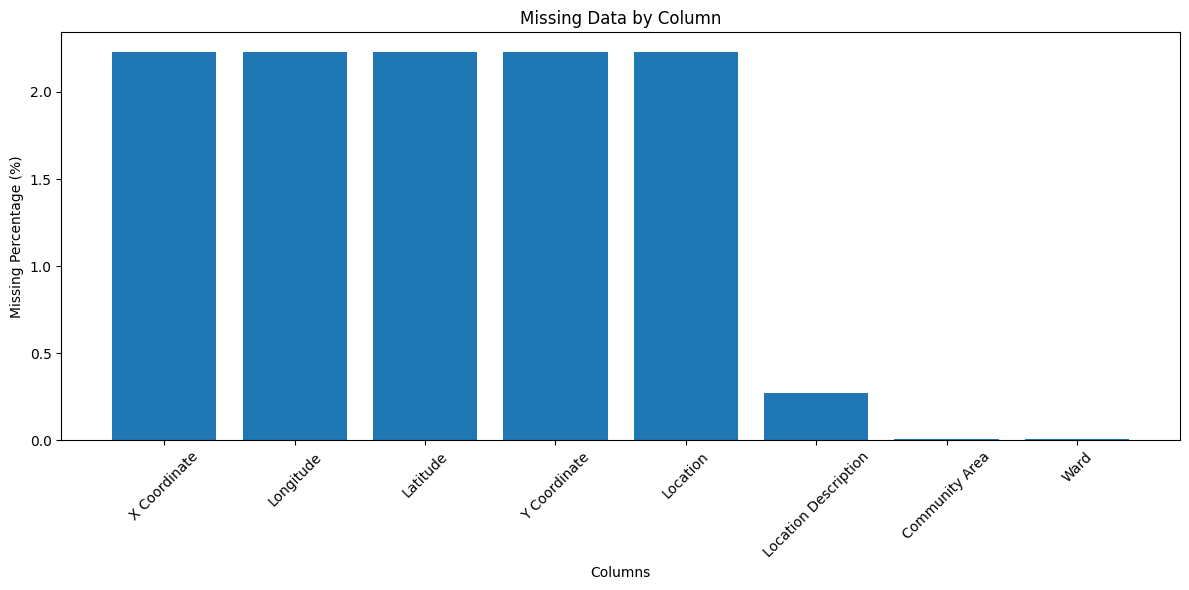

max value is :  1.205111e+06
min value is :  1.094231e+06
mean for X Coordinate is 1164595.375
median for X Coordinate is 1166246.0
max value is :  -87.52461
min value is :  -87.92891
mean for Longitude is -87.6715316772461
median for Longitude is -87.6654281616211
max value is :  42.02255
min value is :  41.644604
mean for Latitude is 41.84221267700195
median for Latitude is 41.85845947265625
max value is :  1.951507e+06
min value is :  1.81391e+06
mean for Y Coordinate is 1885792.875
median for Y Coordinate is 1891648.0
column Location is an object type column
column Location Description is an object type column
max value is :  77
min value is :  1
mean for Community Area is 37.35879435177407
median for Community Area is 32.0
max value is :  50
min value is :  1
mean for Ward is 22.88470538821553
median for Ward is 23.0


In [ ]:
analyze_missingdata(df)

In [ ]:
df.dtypes

ID                               Int32
Case Number             string[python]
Date                    datetime64[ns]
Block                           object
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             Int16
District                          Int8
Ward                              Int8
Community Area                    Int8
FBI Code                      category
X Coordinate                   float32
Y Coordinate                   float32
Year                             int64
Updated On              datetime64[ns]
Latitude                       float32
Longitude                      float32
Location                        object
dtype: object

In [ ]:
df2 =df.copy()
df2.set_index('Date')

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
2015-09-04 11:30:00,10224739,HY411615,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018,2019-04-06 16:04:43,NaN,NaN,NaN
2015-09-05 12:45:00,10224740,HY411595,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
2015-09-05 13:00:00,10224741,HY411610,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28 22:10:00,10215495,HY401397,031XX W LAWRENCE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,True,1713,17,33,14,08B,1154394.0,1931719.0,2015,2018-02-10 15:50:01,41.968464,-87.707680,"(41.968462913, -87.707683157)"
2015-08-29 01:36:00,10215496,HY401545,044XX N SAWYER AVE,0460,BATTERY,SIMPLE,STREET,False,False,1724,17,33,14,08B,1153919.0,1929328.0,2015,2018-02-10 15:50:01,41.961910,-87.709496,"(41.961911365, -87.709493728)"
2015-08-29 03:52:00,10215497,HY401614,037XX W LELAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1723,17,39,14,14,1150607.0,1930973.0,2015,2018-02-10 15:50:01,41.966492,-87.721626,"(41.96649088, -87.721627447)"


In [ ]:
year= df['Year'].sort_values().unique()
year

array([2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

we have records from 2001 - 2023

try finding relationship between year and  updated on

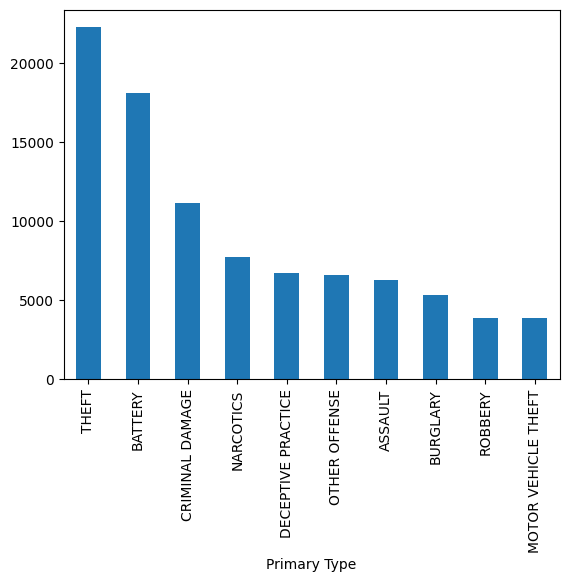

In [ ]:
crimerate=df2['Primary Type'].value_counts().head(10).plot(kind='bar')

In [ ]:
crimerate=df2['Primary Type'].value_counts().head(10)
crimerate

Primary Type
THEFT                  22272
BATTERY                18133
CRIMINAL DAMAGE        11177
NARCOTICS               7732
DECEPTIVE PRACTICE      6702
OTHER OFFENSE           6588
ASSAULT                 6263
BURGLARY                5353
ROBBERY                 3911
MOTOR VEHICLE THEFT     3856
Name: count, dtype: int64

In [ ]:
incitype=['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','DECEPTIVE PRACTICE','OTHER OFFENSE','ASSAULT','BURGLARY','ROBBERY','MOTOR VEHICLE THEFT']
for i in incitype:
    if i in list(df['Primary Type']):
        print(df2.loc[:,:])
    else:
        print('not found')


NameError: name 'df' is not defined

In [ ]:
categTHEFT

NameError: name 'categTHEFT' is not defined

In [ ]:
crimerate.tail()

Primary Type
HUMAN TRAFFICKING           8
NON - CRIMINAL              6
PUBLIC INDECENCY            5
HOMICIDE                    2
OTHER NARCOTIC VIOLATION    2
Name: count, dtype: int64

In [ ]:
# df2.groupby(['Year'])['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code' 'Updated On', 'Latitude', 'Longitude', 'Location']
df2.groupby('Year')['Primary Type'].value_counts()

Year  Primary Type              
2001  DECEPTIVE PRACTICE            3
      BATTERY                       2
      OFFENSE INVOLVING CHILDREN    1
      THEFT                         1
      ARSON                         0
                                   ..
2021  PUBLIC PEACE VIOLATION        0
      ROBBERY                       0
      SEX OFFENSE                   0
      STALKING                      0
      WEAPONS VIOLATION             0
Name: count, Length: 660, dtype: int64

In [ ]:
df2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')